In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

In [2]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')

In [3]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


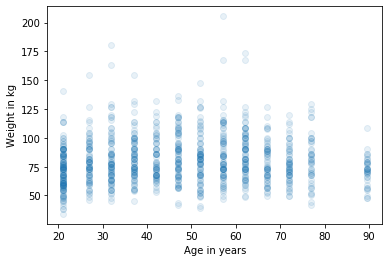

In [4]:
brfss = brfss[:1000]
age = brfss['AGE']
weight = brfss['WTKG3']

plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

### Jitterign

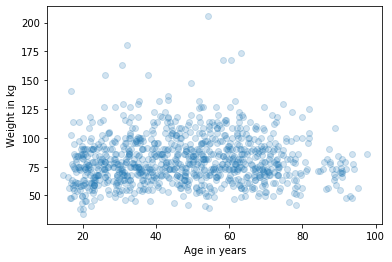

In [5]:
brfss = brfss[:1000]

age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss)) 
weight = brfss['WTKG3']

plt.plot(age, weight, 'o', alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

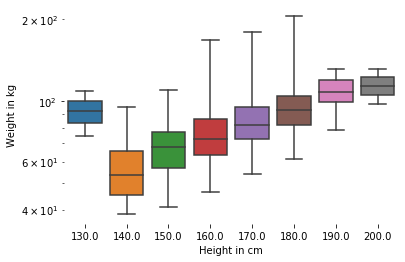

In [6]:
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

plt.yscale('log')
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Distribution of income

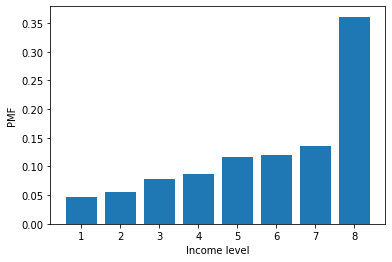

In [7]:
income = brfss['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

### Relationship between income and age

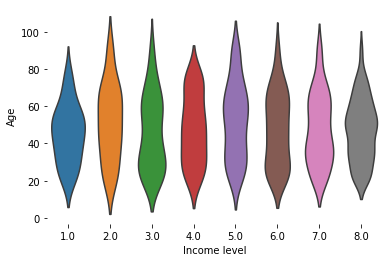

In [8]:
data = brfss.dropna(subset=['INCOME2', 'AGE'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='AGE', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Age')
plt.show()

### Computing correlations

In [9]:
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000
